In [255]:
import pandas as pd
# Pandas kütüphanesi, veri manipülasyonu ve analizi için kullanılır. 
# Veri setlerini yükleyebilir, temizleyebilir, dönüştürebilir ve analiz edebilirsiniz. Genellikle 'pd' olarak kısaltılır.

import matplotlib.pyplot as plt
# Matplotlib kütüphanesi, çeşitli grafikler ve görselleştirmeler oluşturmak için kullanılır.
# Özellikle 2D grafikler, histogramlar ve dağılım diyagramları için kullanılır. 'plt' olarak kısaltılır.

import seaborn as sns
# Seaborn kütüphanesi, Matplotlib'in üstünde çalışan bir veri görselleştirme kütüphanesidir.
# Daha estetik ve anlamlı grafikler oluşturmanıza yardımcı olur. 'sns' olarak kısaltılır.

import numpy as np
# NumPy kütüphanesi, büyük ve çok boyutlu diziler ile matematiksel işlemler yapmak için kullanılır.
# Ayrıca bilimsel hesaplamalar için geniş bir fonksiyon yelpazesi sunar. 'np' olarak kısaltılır.


from sklearn.model_selection import train_test_split, cross_val_score
# train_test_split: Veri setini eğitim ve test setlerine ayırmak için kullanılır.
# cross_val_score: Modelin performansını K-Fold çapraz doğrulama yöntemi ile değerlendirir ve skorları döndürür.

from sklearn.svm import SVC
# SVC (Support Vector Classifier): Destek Vektör Sınıflandırıcısı, sınıflandırma problemlerinde kullanılan bir algoritmadır.
# Özellikle yüksek boyutlu veri setlerinde iyi sonuçlar verebilir.

from sklearn.neighbors import KNeighborsClassifier
# KNeighborsClassifier: K-Nearest Neighbors (KNN) algoritmasını kullanır. Veri noktalarının en yakın komşularına dayanarak sınıflandırma yapar.

from sklearn.tree import DecisionTreeClassifier
# DecisionTreeClassifier: Karar ağaçları algoritmasını kullanarak sınıflandırma yapar. Veriyi dallandırarak karar verir ve ağaç yapısında bir model oluşturur.

from sklearn.naive_bayes import GaussianNB
# GaussianNB: Naive Bayes sınıflandırıcısının bir türüdür. Özellikle verilerin Gauss dağılımına uygun olduğu durumlarda kullanılır.

from sklearn.linear_model import LogisticRegression
# LogisticRegression: Lojistik regresyon kullanarak sınıflandırma yapar. Genellikle ikili sınıflandırma problemleri için kullanılır.

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
# accuracy_score: Modelin doğruluk oranını hesaplar, gerçek etiketler ile tahmin edilen etiketler arasındaki uyumu ölçer.
# confusion_matrix: Karışıklık matrisini oluşturur, doğru ve yanlış sınıflandırmaların sayısını gösterir.
# classification_report: Sınıflandırma sonuçlarını detaylı bir şekilde raporlar, precision, recall, f1-score gibi metrikleri içerir.
# roc_curve: ROC eğrisini oluşturur, modelin True Positive Rate (TPR) ve False Positive Rate (FPR) değerlerini gösterir.
# auc: ROC eğrisinin altında kalan alanı hesaplar (AUC), modelin genel performansını ölçmek için kullanılır.

from sklearn import preprocessing
# preprocessing: Veri ön işleme tekniklerini içerir, özellik ölçekleme, normalizasyon ve veri dönüşümleri sağlar.

from sklearn.preprocessing import MinMaxScaler
# MinMaxScaler: Özellikleri belirli bir aralıkta (genellikle 0-1) ölçeklendirir.
# Özellikle farklı ölçeklerdeki özellikleri normalize etmek için kullanılır.

from sklearn.tree import DecisionTreeClassifier, plot_tree
# DecisionTreeClassifier: Karar ağaçları algoritmasını kullanarak sınıflandırma yapar.
# plot_tree: Karar ağaçlarının görselleştirilmesini sağlar. Karar ağaçlarının yapısını anlamak için kullanılır.


In [256]:
data = pd.read_csv('breast-cancer.csv')
#Python'da pandas kütüphanesini kullanarak bir CSV dosyasını okur ve bir DataFrame nesnesine yükler

In [257]:
data.info()
##pandas kütüphanesi ile bir DataFrame nesnesi üzerinde kullanıldığında,
#DataFrame'in yapısı ve içeriği hakkında özet bilgi sağlar.(Veri setinde kaç satır, sütun bulunduğu.Her bir sütunun adı ve veri türü:int64, float64, object, datetime64 gibi)
#Her sütunda kaç tane boş (null) değer olduğu.Bu komut, veri setinizin genel özelliklerini anlamanıza yardımcı olur. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [258]:
data.describe().T
#data.describe() fonksiyonu, sayısal veriler içeren sütunlar için özet istatistikleri hesaplar.
#Bu özet istatistikler genellikle şunları içerir:
#count: Her sütundaki geçerli (non-null) değerlerin sayısı.
#mean: Ortalama değer.
#std: Standart sapma (veri dağılımının ne kadar yayılacağını gösterir).
#min: En küçük değer.
#25%: İlk çeyrek (25. persentil) değeri.
#50%: Medyan (orta değer) veya ikinci çeyrek (50. persentil) değeri.
#75%: Üçüncü çeyrek (75. persentil) değeri.
#max: En büyük değer.
#.T özelliği, DataFrame'in transpoze edilmesini sağlar. Yani, satırlar ve sütunlar yer değiştirir. Bu, özet istatistiklerin sütun adlarıyla yatay olarak gösterilmesini sağlar,böylece her bir sütunun özet istatistikleri daha okunabilir bir biçimde sunulur.

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [259]:
data.isnull().sum()
#bu komut veri setinizdeki her sütundaki eksik (null) değerlerin sayısını belirler. Bu, veri temizliği ve ön işleme sürecinde önemli bir adımdır çünkü eksik değerler, veri analizi ve modelleme sonuçlarını etkileyebilir. Bu komut sayesinde, eksik değerlerin hangi sütunlarda bulunduğunu ve ne kadar eksik veri olduğunu hızlı bir şekilde görebilirsiniz.

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [260]:
le = preprocessing.LabelEncoder() #preprocessing.LabelEncoder() Scikit-learn kütüphanesinin bir sınıfıdır ve kategorik (yani sınıflandırılmış) verileri sayısal değerlere dönüştürmek için kullanılır. Her kategorik değere bir sayı atar.
le.fit(data['diagnosis']) #fit(): Bu metod, LabelEncoder nesnesini veri üzerinde "eğitir". Yani, data['diagnosis'] sütunundaki benzersiz kategorileri tanır ve her bir benzersiz kategoriye bir sayı atar.
data['diagnosis'] = le.transform(data['diagnosis'])

In [261]:
# Özellikleri (features) seçmek için DataFrame'in 3. sütundan başlayıp son sütun hariç olan sütunları seç
# `data.columns[2:-1]` ifadesi, 3. sütundan (index 2) itibaren tüm sütunları seçer ve son sütunu hariç tutar.
# Sonuç olarak, `X` DataFrame'in modelleme için kullanılacak özelliklerini içerir.
X = data[data.columns[2:-1]]
# Hedef değişkeni (target variable) seçmek için `diagnosis` adlı sütunu seç
# Bu sütun, modelin tahmin etmeye çalışacağı hedef değerleri içerir.
# Sonuç olarak, `y` hedef değişkeni (labels) içerir.
y = data['diagnosis']

In [262]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=100)

In [263]:
# Özelliklerin değerlerini [0, 1] aralığına ölçeklendirmek için MinMaxScaler'ı oluştur
scaler = MinMaxScaler()
# Eğitim veri kümesine (X_train) fit ederek minimum ve maksimum değerleri hesapla
# Bu değerler, ölçeklendirme işlemi için kullanılacaktır
scaler.fit(X_train)
# Eğitim veri kümesini (X_train) dönüştürerek ölçeklendir
# Bu işlem, özelliklerin değerlerini [0, 1] aralığına getirir
X_train = scaler.transform(X_train)
# Test veri kümesini (X_test) aynı ölçeklendirme dönüşümüne tabi tut
# Test veri kümesinin de eğitim veri kümesinin öğrenilen ölçek aralığında olması sağlanır
X_test = scaler.transform(X_test)

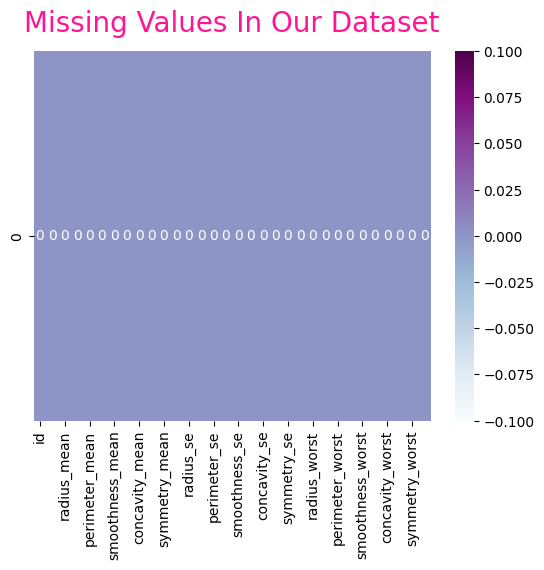

In [264]:
# Eksik değerlerin sayısını hesaplayıp DataFrame'e dönüştürür ve transpoze eder
# DataFrame'i transpoze ederek sütunları satır olarak gösteririz, böylece eksik değerler daha okunabilir şekilde sunulur
sns.heatmap(pd.DataFrame(data.isna().sum()).T,annot=True,cmap="BuPu",fmt='d')
# Grafik başlığını belirler
# 'Missing Values In Our Dataset': Başlığın kendisi
# fontsize=20: Başlık fontunun boyutu
# color='#FF1493': Başlık rengini canlı pembe olarak ayarlar
# y=1.03: Başlığı grafik üst sınırından biraz yukarıda gösterir
plt.title('Missing Values In Our Dataset',fontsize=20, color = '#FF1493', y=1.03)
# Grafiği ekranda gösterir
plt.show()

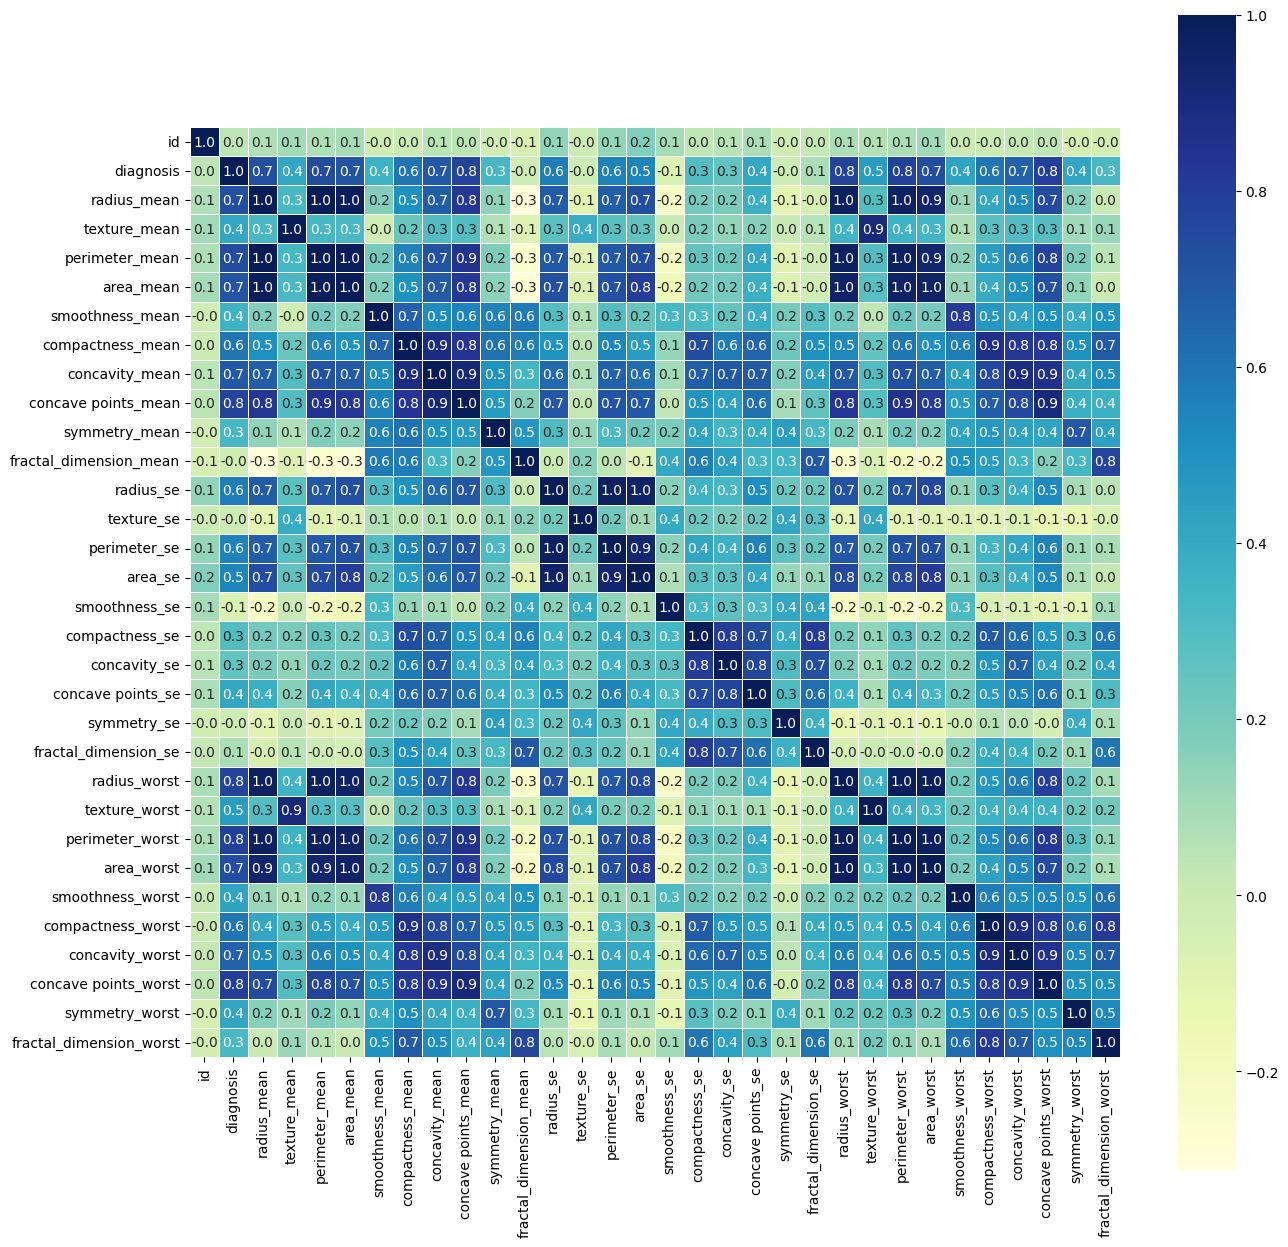

In [265]:
# Check strength of the relationship between variables:
corr=data.corr()
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr,annot=True,linewidths=0.5,fmt=".1f",ax=ax,cmap="YlGnBu",square=True)
plt.show()

In [266]:
models = {
    # Lojistik Regresyon modelini oluşturur. Modelin konverjansını iyileştirmek için maksimum 1000 iterasyon kullanılır.
    'Logistic Regression': LogisticRegression(max_iter=1000),
    
    # Destek Vektör Sınıflandırıcısı (SVM) modelini oluşturur. Varsayılan hiperparametrelerle kullanılır.
    'SVM': SVC(),
    
    # K-en yakın komşu (KNN) modelini oluşturur. 3 en yakın komşu ve Euclidean mesafesi kullanılır.
    'KNN': KNeighborsClassifier(n_neighbors=3, metric='euclidean'),
    
    # Karar Ağaçları modelini oluşturur. 'Entropy' kriterini kullanarak bilgi kazancını hesaplar.
    'Decision_Tree': DecisionTreeClassifier(criterion='entropy'),
    
    # Gaussian Naive Bayes modelini oluşturur. Özelliklerin normal dağıldığını varsayar.
    'Naive Bayes': GaussianNB()
}


In [267]:
# Çapraz doğrulama işlemi için kullanılacak katlama (fold) sayısını belirler
# k_folds=10, veri kümesinin 10 eşit parçaya bölüneceğini ve her parçanın bir test seti olarak kullanılacağını belirtir
# Bu, modelin performansını 10 farklı eğitim ve test seti kombinasyonuyla değerlendirmenizi sağlar
k_folds = 10

In [268]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

def evaluate_and_train_models(models, X_train, y_train, X_test, y_test, k_folds):
    # Sonuçları depolamak için bir sözlük ve listeler oluştur
    results = {}
    cv_means = []
    test_accuracies = []
    model_names = []
    
    # Her bir model için döngü başlat
    for name, model in models.items():
        print(f"Evaluating and Training {name}...")
    
        # Çapraz doğrulama ile model değerlendirmesi yap
        cv_scores = cross_val_score(model, X_train, y_train, cv=k_folds, scoring='accuracy')
        results[name] = {
            'cv_scores': cv_scores,
            'cv_mean': cv_scores.mean(),  # Çapraz doğrulama sonuçlarının ortalaması
            'cv_std': cv_scores.std()     # Çapraz doğrulama sonuçlarının standart sapması
        }
        
        # Modeli eğitim verileri ile eğit
        model.fit(X_train, y_train)
        
        # Test verileri ile tahmin yap
        y_pred = model.predict(X_test)
        
        # Test doğruluğunu hesapla
        accuracy = accuracy_score(y_test, y_pred)
        # Karışıklık matrisini hesapla
        conf_matrix = confusion_matrix(y_test, y_pred)
        # Sınıflandırma raporunu oluştur
        class_report = classification_report(y_test, y_pred)
        
        # Sonuçları güncelle
        results[name].update({
            'test_accuracy': accuracy,             # Test doğruluğu
            'confusion_matrix': conf_matrix,       # Karışıklık matrisi
            'classification_report': class_report  # Sınıflandırma raporu
        })
        
        # Modelin `predict_proba` fonksiyonu varsa, ROC eğrisi ve AUC hesapla
        if hasattr(model, "predict_proba"):  
            y_prob = model.predict_proba(X_test)[:, 1]  # Pozitif sınıf için olasılıkları al
            fpr, tpr, _ = roc_curve(y_test, y_prob)    # ROC eğrisinin false positive rate ve true positive rate'lerini hesapla
            roc_auc = auc(fpr, tpr)                    # ROC eğrisinin altında kalan alanı hesapla
            results[name].update({
               'fpr': fpr,                           # False Positive Rate
                'tpr': tpr,                           # True Positive Rate
                'roc_auc': roc_auc                    # AUC (Area Under Curve)
            })
        else:
            # `predict_proba` fonksiyonu olmayan modeller için None değerlerini ata
            results[name].update({
                'fpr': None,
                'tpr': None,
                'roc_auc': None
            })
        
        # Modelin performansını yazdır
        print(f"{name} Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
        print(f"{name} Test Accuracy: {accuracy:.4f}")
        print("Confusion Matrix:")
        print(conf_matrix)
        print("Classification Report:")
        print(class_report)
        print("\n")
        
        # Çapraz doğrulama ortalamalarını ve test doğruluklarını listeye ekle
        cv_means.append(cv_scores.mean())
        test_accuracies.append(accuracy)
        model_names.append(name)
    
    # Çapraz Doğrulama Doğruluğu Grafiği
    plt.figure(figsize=(8, 6))
    plt.bar(model_names, cv_means, color='b', alpha=0.7, label='Cross-Validation Accuracy')
    plt.xlabel('Models')                 # X ekseninin etiketini ayarla
    plt.ylabel('Accuracy')               # Y ekseninin etiketini ayarla
    plt.title('Cross-Validation Accuracy of Models')  # Grafik başlığı
    plt.legend()                         # Grafikte etiketleri göster
    plt.grid(True)                       # Izgara çizgilerini göster
    plt.show()                           # Grafiği ekranda göster
    
    # Plot Test Accuracy
    plt.figure(figsize=(8, 6))
    plt.bar(model_names, test_accuracies, color='r', alpha=0.7, label='Test Accuracy')
    plt.xlabel('Models')                 # X ekseninin etiketini ayarla
    plt.ylabel('Accuracy')               # Y ekseninin etiketini ayarla
    plt.title('Test Accuracy of Models')  # Grafik başlığı
    plt.legend()                         # Grafikte etiketleri göster
    plt.grid(True)                       # Izgara çizgilerini göster
    plt.show()                           # Grafiği ekranda göster
    
    return results  # Sonuçları döndür


Evaluating and Training Logistic Regression...
Logistic Regression Cross-Validation Accuracy: 0.9668 ± 0.0248
Logistic Regression Test Accuracy: 0.9474
Confusion Matrix:
[[35  0]
 [ 3 19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        35
           1       1.00      0.86      0.93        22

    accuracy                           0.95        57
   macro avg       0.96      0.93      0.94        57
weighted avg       0.95      0.95      0.95        57



Evaluating and Training SVM...
SVM Cross-Validation Accuracy: 0.9805 ± 0.0151
SVM Test Accuracy: 0.9649
Confusion Matrix:
[[35  0]
 [ 2 20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        35
           1       1.00      0.91      0.95        22

    accuracy                           0.96        57
   macro avg       0.97      0.95      0.96        57
weighted avg       0.97

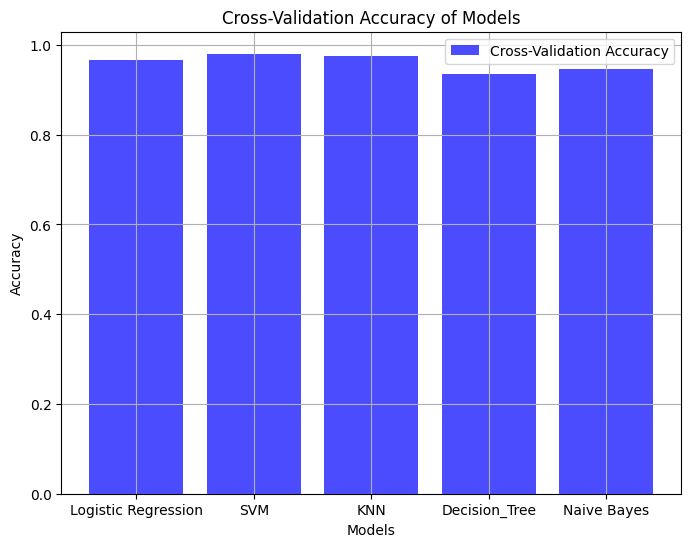

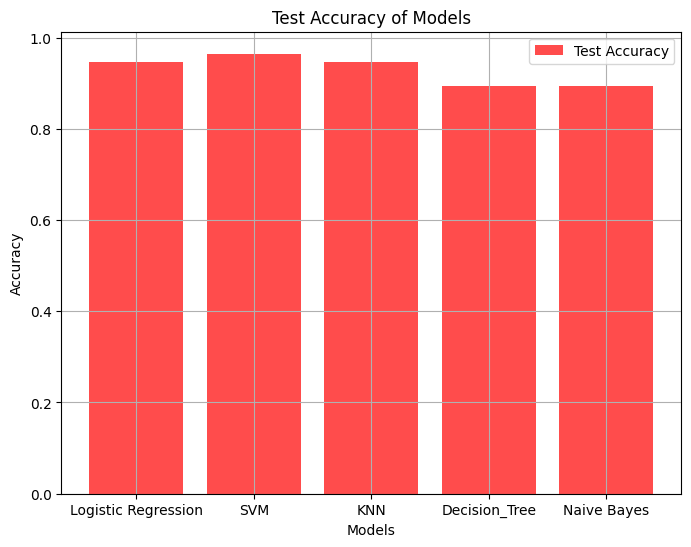

In [269]:
results = evaluate_and_train_models(models, X_train, y_train, X_test, y_test, k_folds)
# `evaluate_and_train_models` fonksiyonunu çağırarak modellerin değerlendirilmesini ve eğitimini yapar.
# Bu fonksiyon, verilen modeller üzerinde çapraz doğrulama, test değerlendirmesi ve performans metriklerinin hesaplanmasını sağlar.
# Fonksiyonun döndürdüğü sonuçlar, her model için çeşitli değerlendirme metriklerini içeren bir sözlük olacaktır.
# Bu sonuçlar, model performansını analiz etmek ve karşılaştırmak için kullanılabilir